In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# Standard Deviation

In [ ]:
values = make_array(2, 3, 3, 9)
sd_table = Table().with_columns('Value', values)
sd_table

In [ ]:
np.mean(values)

In [ ]:
values - 4.25

**Question:** How far is each example from the mean?
    
<details>
<summary>Solution</summary>
  Compute the average value then subtract that by each value
</details>

<details>
    <summary> code</summary>
mean_value = np.mean(values) # Don't forget about step 1
deviations = values - mean_value # deviations from average, aka distance of each element from the average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table
</details>

In [ ]:
mean_value = np.mean(values) # Don't forget about step 1
deviations = values - mean_value # deviations from average, aka distance of each element from the average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

**Question**: What is the typical deviation? What do we use to compute the "typical"?
<details>
<summary>Solution</summary>
  average. Let's take the average of the deviations
</details>

In [ ]:
np.average(sd_table.column('Deviation'))

**Question**: Average is the sum divided by the number of examples. What is the sum of these deviations?
<details>
<summary>Solution</summary>
  sum(deviations)
</details>

We care about the size of the deviation.

We've use `abs()` to find the size before, but here we will take the square value of the deviations

In [ ]:
deviations ** 2

In [ ]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Variance of the data is the average of these squared deviations


In [ ]:
variance = np.mean(sd_table.column('Squared Deviation'))
variance

Standard Deviation (SD) is the square root of the variance

The square root gets us back to the same units as in the data

In [ ]:
sd = variance ** 0.5
sd

#### Computing std in numpy 

In [ ]:
np.std(values), np.mean(values)

(back to slides - review of Standard deviation)
# Chebyshev's Bound

In [ ]:
births = Table.read_table('baby.csv')
births.show(3)

In [ ]:
births.hist()

Let's set overlay = False

In [ ]:
births.drop("Maternal Smoker").hist(overlay = False)

For now, lets look at Maternal Pregnancy Weight

In [ ]:
mpw = births.column("Maternal Pregnancy Weight") # Get the column
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

In [ ]:
std_lower = mean - (3*sd)
std_upper = mean + (3*sd)

Let's find all the examples that are within 3 SDs of the mean:

<details>
<summary>Solution</summary>
  births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))
</details>


In [ ]:
within_3_SDs = ...
within_3_SDs

Chebyshev's bound tells us that the proportion should be at least


In [ ]:
1 - 1/(3**2)

**Question:** What is the proportion within 3 SDs of the mean?

<details>
<summary>Solution</summary>
  within_3_SDs.num_rows / births.num_rows
</details>

Let's see if Chebyshev's bounds work for distributions with various shapes for the different columns

Let's comment the code together before we run it

In [ ]:
for feature in births.labels:       # What does this line do?
    values = births.column(feature) # What does this line do?
    mean = np.mean(values) # What does this line do?
    sd = np.std(values) # What does this line do?
    print() # What does this line do?
    print(feature) # What does this line do?
    for z in make_array(2, 3, 4, 5): # What does this line do?
        # What does the line below?
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        # What does the line below?
        proportion = chosen.num_rows / births.num_rows
        # What does the line below?
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')

(back to slides)
# Standard Units

Lets create a function where given a list of values called `x`, we want to return a list of standard units.

<details>
<summary>Solution</summary>
  return (x - np.mean(x)) / np.std(x)
</details>

Remember: `z = (value - average)/SD`

In [5]:
def standard_units(x):
    """Convert array x to standard units."""
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std
    #return ...

In [4]:
make_array(2,3,4) - 1

array([1, 2, 3])

In [6]:
curr_values = make_array(2, 3, 3, 9)
standard_units(curr_values), np.average(curr_values), np.std(curr_values)

(array([-0.81150267, -0.45083482, -0.45083482,  1.71317231]),
 4.25,
 2.7726341266023544)

In [7]:
np.average(standard_units(curr_values))

0.0

In [8]:
np.std(standard_units(curr_values))

0.9999999999999999

Let's now convert the values in the `Maternal Age` column in the `births` table to standard units

In [9]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [10]:
births.column('Maternal Age')

array([27, 33, 28, ..., 30, 21, 38])

In [11]:
ages = births.column('Maternal Age') # get the column
ages_standard_units = standard_units(ages) # convert the column to standard units 
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

**Question:** What was the original mean and std of the ages?

In [13]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

In [19]:
lower = np.mean(ages) - (2*np.std(ages))
upper = np.mean(ages) + (2*np.std(ages))
lower, upper

(15.597558578330302, 38.85900019509389)

In [21]:
help(are.between)

Help on function between in module datascience.predicates:

between(y, z)
    Greater than or equal to y and less than z.



In [24]:
births.where('Maternal Age', are.between(lower, upper)).num_rows

1114

**Question:** What is the new mean and std of the ages?

*Let's answer this before we run the cell below*

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

Let's put ages and the ages as standard units into a table called `both`

In [25]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


(back to slides) - Question in the slides 

**Question:** What is the  mean and std of the ages?

<details>
<summary>Solution</summary>
  np.mean(ages), np.std(ages)
</details>

In [ ]:
np.mean(ages), np.std(ages)

Let's now plot the histograms of the ages and the ages in standard units

In [ ]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

In [ ]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

(back to slides)
# The SD and Bell Shaped Curves

It's hard to tell the SD from the histogram above.

Instead, lets look at the heights of the mothers.

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

**Question:** Where would we guess the average is?

**Question:** Where is the point of inflection?

**Hint Question:** What do we mean by *point of inflection*?

<details>
<summary>Solution</summary>
  start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. 
</details>


Now let's check the mean and std by running the code below 

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

Lets compute the range of 1 STD

In [ ]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

Let's look at another example.

From the above plots, which histograms look like a bell curve?

In [ ]:
# Solution below





















births.hist('Birth Weight') #, bins = np.arange(56.5, 72.6, 1))

**Question:** What's the average and whats the std?

In [ ]:
np.mean(births.column('Birth Weight')), np.std(births.column('Birth Weight'))

# Correlation

In [26]:
galton = Table.read_table('galton.csv')
galton.show(5)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5


Let's make a table that just has the heights

<details>
<summary>Solution</summary>
  'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
</details>

In [28]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


Let's show a scatter plot where MidParent is on the x-axis

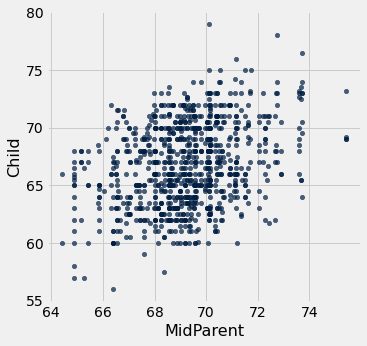

In [29]:
heights.scatter('MidParent')

Now let's predict the child's height based on the average of the parents' height

(brief discussion)

**Question:** What type of trend do we see?

<details>
<summary>Solution</summary>
  We see an association between midParent height and child height
</details>

Let's look at another table

In [30]:
hybrids = Table.read_table('hybrid.csv')
hybrids.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


**Question:** Is there an association between `acceleration` and `mpg`?

<details>
<summary>Code</summary>
  hybrids.select("mpg", "acceleration").scatter("mpg")
</details>

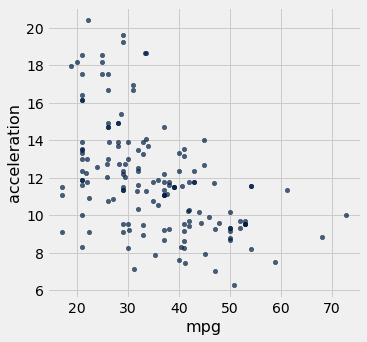

In [31]:
hybrids.select("mpg", "acceleration").scatter("mpg")

**Question:** What does this plot show?

**Question:** What about `acceleration` and price (`msrp`)?

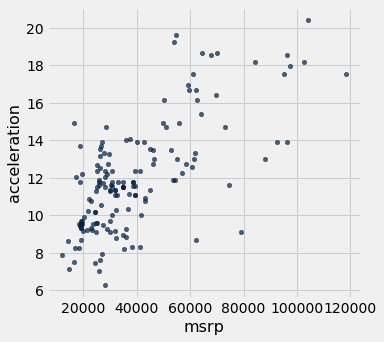

In [32]:
hybrids.select("msrp", "acceleration").scatter("msrp")

**Question:** Do we see the same trends with standard units?

In [33]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [ ]:
# Steps:
# 1. convert each column to their own standard units
# 2. store the standard unit columns
# 3. show a histogram with the standard units

In [37]:
np.mean(standard_units(hybrids.column('msrp'))), np.std(standard_units(hybrids.column('msrp')))

(-1.3932210505100003e-16, 0.9999999999999999)

In [40]:
hybrids = hybrids.with_column("msrp su", standard_units(hybrids.column('msrp')))
hybrids = hybrids.with_column("acc su", standard_units(hybrids.column('acceleration')))
hybrids

vehicle,year,msrp,acceleration,mpg,class,msrp su,acc su
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact,-0.69363,-1.53501
Tino,2000,35355,8.2,54.1,Compact,-0.18568,-1.2825
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact,-0.584852,-1.36098
Insight,2000,18936.4,9.52,53,Two Seater,-0.954663,-0.832081
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact,-0.631636,-1.67832
Insight,2001,19036.7,9.52,53,Two Seater,-0.949966,-0.832081
Insight,2002,19137,9.71,53,Two Seater,-0.945268,-0.767248
Alphard,2003,38084.8,8.33,40.46,Minivan,-0.057827,-1.23814
Insight,2003,19137,9.52,53,Two Seater,-0.945268,-0.832081
Civic,2003,14071.9,8.62,41,Compact,-1.1825,-1.13919


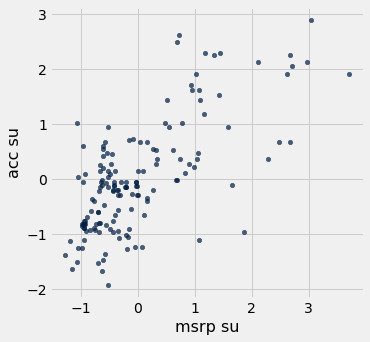

In [41]:
hybrids.select("msrp su", "acc su").scatter("msrp su")

This figure shows us we can measure the assocation between these two variables based on their standard units

(back to slides)

# Correlation Coefficient

Dont worry about this function for now. Just read the doc string

In [64]:
def r_scatter(r):
    """ Draws a scatter diagram with correlation r"""
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 100)
    z = np.random.normal(0, 1, 100) #increase this number to see more points
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

Let's pass in different values to `r_scatter()` and see what we get

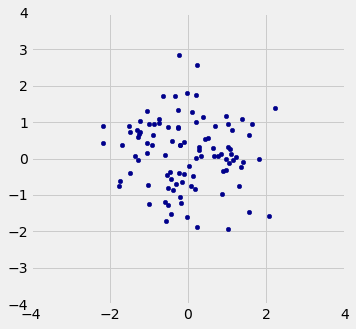

In [70]:
r_scatter(0)

In [ ]:
r_scatter(0)

# Calculating *r*

Let's look at this small example

In [ ]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

In [ ]:
t.scatter('x', 'y', s=30, color='red')

**Question:** What should *r* be here?


<details>
<summary>Solution</summary>
  positive, but less than 1
</details>

Let's try finding *r*

First thing to do is convert the data into ____?


<details>
<summary>Solution</summary>
  standard units
</details>

In [ ]:
# skip












In [ ]:
t = t.with_columns(
        'x (standard units)', ...,
        'y (standard units)', ...
    )
t

Let's make another column where each value is x (su) * y (su)

In [ ]:
t = t.with_columns('product of standard units', ...)
t

In [ ]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

(back to slides)

## Function to compute *r*

Let's fill in the following function
<details>
<summary>Code</summary>
  x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)
</details>


In [ ]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    ...
    ...
    return ...

**Question:** How linearly correlated are the variables we considered before from the hybrid cars?

In [ ]:
# hybrids.select("msrp", "acceleration")
# acceleration, msrp
hybrids.labels

Judging correlations by eye is pretty hard, unless the correlation is -1 and 1

## Switching x and y axes

Do we think our correlations will change?

In [ ]:
# lets try it

## Nonlinearity

In [ ]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

**Question:** are x and y here associated? 
<details>
<summary>Solution</summary>
  Yes, clearly
</details>
    
**Question:** But what is the *r* value?

In [ ]:
correlation(nonlinear, 'x', 'y')

## Outliers

In [ ]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

**Question:** What is *r* here

In [ ]:
correlation(line, 'x', 'y')

Now let's look at the same example but with an outlier

In [ ]:

outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

**Question:** Are x and y here still correlated?
    
<details>
<summary>Solution</summary>
  We want to say yes, or atleast mostly
</details>

In [ ]:
correlation(outlier, 'x', 'y')

**Question:** Did the outlier affect the correlation?
    
<details>
<summary>Solution</summary>
  Yes!
</details>

(back to slides)
## Ecological Correlations

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

**Question:** Is there a correlation between `Math` and `Critical Reading` scores on the SAT?

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

If we want to predict math score from critical reading score, we think about it on an individual case.

But here, the data is on the state level. We can see that the correlation is inflated when we aggregate the data. This relationship won't be true on the individual level

**Question:** If we didn't aggregate the data, how many points would we see in the graph?

<details>
<summary>Solution</summary>
  A lot more. For every point we see in the graph, we would see blob of points where the center of a blob was one of the points in our graph
</details>

When showing a scatter plot and computing *r*, think about the individuals and the aggregate

# Prediction

In [ ]:
galton = Table.read_table('galton.csv')
galton.show(5)

In [ ]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

In [ ]:
heights.scatter('MidParent')

**Question:** Are these two variables correlated?

**Question:** Can we quantify how linearly correlated they are?

In [ ]:
correlation(heights, "MidParent", "Child")

### Predicting child heights based on parent's midheight

In [ ]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()

In [ ]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

In [ ]:
heights_with_predictions.scatter('MidParent')

(back to slides)
# Linear Regression

In [ ]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in this class


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

Let's look at an example where our data is linearly correlated

In [ ]:
example = r_table(0.99)
example.show(3)

`example` is a table of 1k examples where `x` and `y` have a correlation coefficient of 0.99



**Question:** How could we visualize the correlation?

<details>
<summary>Solution</summary>
  example.scatter('x', 'y')
</details>

In [ ]:
...
resize_window()

Let's now make our predictions

In [ ]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))

**Question:** What should our `y` value be when `x` is 0?

In [ ]:
nn_prediction_example(0)

**Question** What about when `x` is 2 or -2?

In [ ]:
nn_prediction_example(2.5), nn_prediction_example(-3)

Now let's apply the prediction function to our table

In [ ]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

Let's plot the predictions (in yellow)

In [ ]:
example.scatter('x')
resize_window()

In [ ]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

Now let's make a new table where the data is not linearly correlated

In [ ]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [ ]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=0, color='dodgerblue')
resize_window()

Now let's look at an example where the scatter plot is oval shaped

In [ ]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

(back to slides)

# Linear regression: defining the line


In [ ]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

**Question:** let's compute the slope and intercept

<details>
<summary>Equation</summary>
  ![image.png](slope_intercept_eq.png)
</details>


<!-- copy the equation markdown to this cell and change the cell to markdown -->
(put equation here)

In [ ]:
def slope(t, x, y):
    

def intercept(t, x, y):
    return 

In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')